In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\karthik\Desktop\Internship\CODEALPHA\Data Visualization\global_unemployment_data.csv')
print(df.head())
print(df.info())


  country_name                    indicator_name     sex age_group  \
0  Afghanistan  Unemployment rate by sex and age  Female     15-24   
1  Afghanistan  Unemployment rate by sex and age  Female       25+   
2  Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3  Afghanistan  Unemployment rate by sex and age    Male     15-24   
4  Afghanistan  Unemployment rate by sex and age    Male       25+   

  age_categories    2014    2015    2016    2017    2018    2019    2020  \
0          Youth  13.340  15.974  18.570  21.137  20.649  20.154  21.228   
1         Adults   8.576   9.014   9.463   9.920  11.223  12.587  14.079   
2       Children  10.306  11.552  12.789  14.017  14.706  15.418  16.783   
3          Youth   9.206  11.502  13.772  16.027  15.199  14.361  14.452   
4         Adults   6.463   6.879   7.301   7.728   7.833   7.961   8.732   

     2021    2022    2023    2024  
0  21.640  30.561  32.200  33.332  
1  14.415  23.818  26.192  28.298  
2  17.134  26.

In [6]:

print(df.columns)
print(df.describe())


Index(['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')
              2014         2015         2016         2017         2018  \
count  1134.000000  1134.000000  1134.000000  1134.000000  1134.000000   
mean     11.387800    11.272444    11.122963    10.863516    10.516499   
std      11.119002    10.915942    10.742947    10.640980    10.527773   
min       0.027000     0.034000     0.038000     0.035000     0.044000   
25%       3.933500     3.993500     3.945250     3.747500     3.672750   
50%       7.697500     7.547500     7.504500     7.140500     6.706000   
75%      15.050750    14.766250    14.467500    14.142000    13.343000   
max      74.485000    74.655000    74.720000    75.416000    76.395000   

              2019         2020         2021         2022         2023  \
count  1134.000000  1134.000000  1134.000000  1128.0000

In [8]:
print(df.columns.tolist())


['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [3]:
import pandas as pd

df = pd.read_csv(r'C:\Users\karthik\Desktop\Internship\CODEALPHA\Data Visualization\global_unemployment_data.csv')

df_melted = pd.melt(
    df,
    id_vars=['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories'],
    value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    var_name='Year',
    value_name='Unemployment Rate'
)

df_melted['Year'] = df_melted['Year'].astype(int)
df_melted['Unemployment Rate'] = pd.to_numeric(df_melted['Unemployment Rate'], errors='coerce')
df_melted.dropna(subset=['Unemployment Rate'], inplace=True)


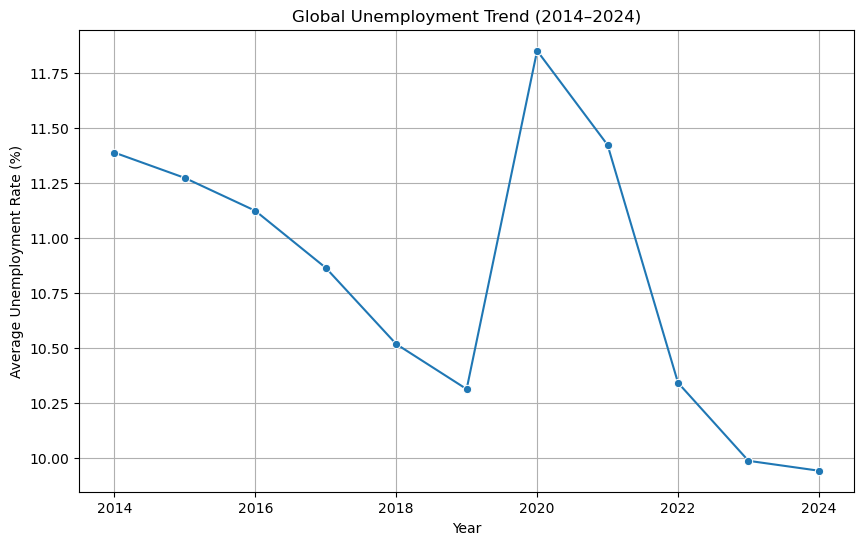

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

global_trend = df_melted.groupby('Year')['Unemployment Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_trend, x='Year', y='Unemployment Rate', marker='o')
plt.title('Global Unemployment Trend (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.show()


In [12]:
top_2022 = df_melted[df_melted['Year'] == 2022].groupby('country_name')['Unemployment Rate'].mean().sort_values(ascending=False).head(10)


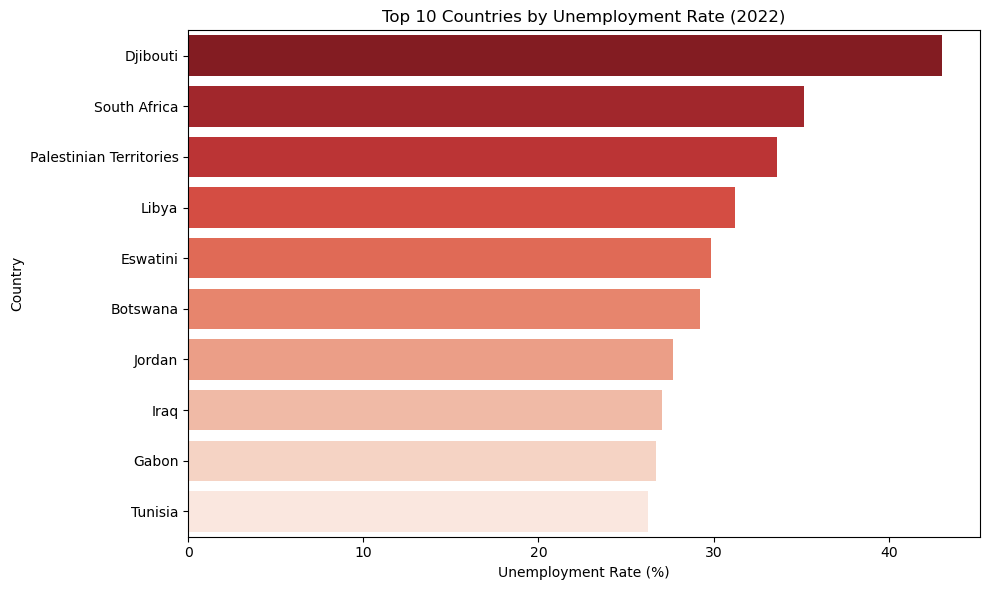

In [6]:
top_df = top_countries_2022.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_df,
    x='Unemployment Rate',
    y='country_name',
    hue='country_name',
    palette='Reds_r',
    legend=False
)
plt.title('Top 10 Countries by Unemployment Rate (2022)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


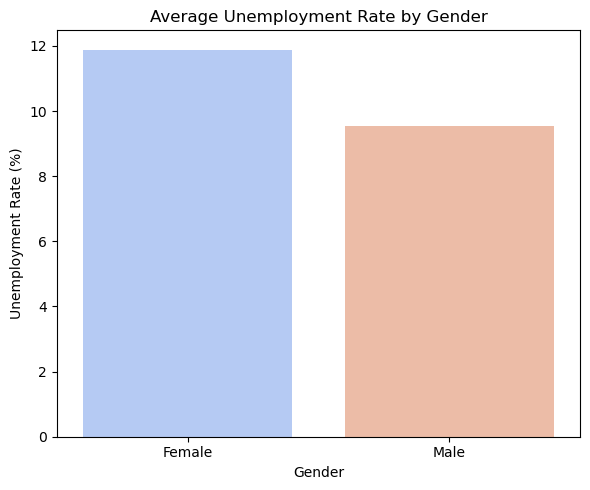

In [15]:
gender_avg = df_melted.groupby('sex')['Unemployment Rate'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=gender_avg, x='sex', y='Unemployment Rate', hue='sex', palette='coolwarm', legend=False)
plt.title('Average Unemployment Rate by Gender')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


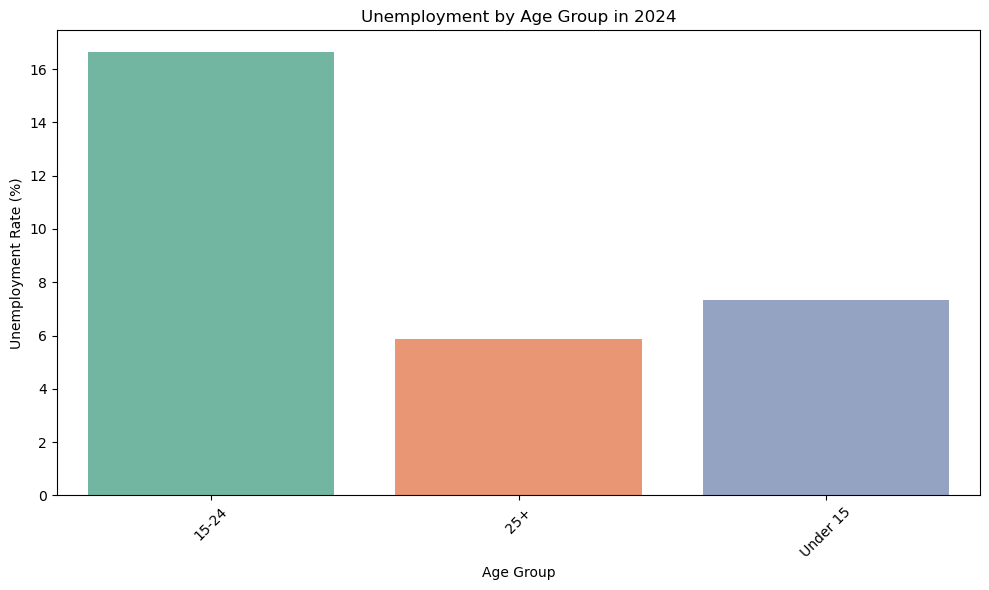

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=age_2024, x='age_group', y='Unemployment Rate', hue='age_group', palette='Set2', legend=False)
plt.title('Unemployment by Age Group in 2024')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
